In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Classified Data',index_col=0)
df.head()
#its a classified data,so you will not be able to make a head or tail out of it like what the colun names represent, what are these values for
#You have to use these features in order to predict the target class they belong to.


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
#beacuse the KNN algo predicts the class of a given test observation, by identifying the observations that are nearest to it, the scale of the variable matters a lot
#e.g- age values will be 20-60, however salary values will be 50000-500000
#Any variable which will be on a large scale will have much larger impact on the distance between observations
#In order to avoid this situation, whenever we are using KNN as the classifier algo, you should STANDARDIZE every feature to the same scale
#scikit learn can help in the standardization
from sklearn.preprocessing import StandardScaler

In [4]:
#creating an object of the scaler
scaler=StandardScaler()

In [6]:
#fitting the scaler object with all features except the TARGET CLASS
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
#using the scaler object to perform transformation
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [21]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [11]:
#creating a new dataframe with data=scaled_features. For columns, once again we have taken all the columns, except the last one which is TARGET CLASS
df_feat=pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [12]:
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
5,-0.399853,1.591707,0.928649,1.477102,0.308440,0.263270,1.239716,0.722608,-2.206816,0.809900
6,-0.017189,0.534949,0.826189,-1.723636,-0.147547,-2.010505,-0.206348,-1.096313,-0.158215,-1.233974
7,-0.461182,-0.100835,0.210071,-1.909291,-0.366695,0.396875,0.718122,0.934523,0.228458,0.308929
8,-0.598054,1.360189,-0.172618,-1.502292,-1.192485,0.504787,-0.325981,0.834346,-0.136536,-0.670199
9,-0.612806,-2.331876,0.197211,1.127356,1.636853,-0.225233,0.948308,-1.644881,1.309064,-1.865764


In [23]:
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
5,-0.399853,1.591707,0.928649,1.477102,0.308440,0.263270,1.239716,0.722608,-2.206816,0.809900
6,-0.017189,0.534949,0.826189,-1.723636,-0.147547,-2.010505,-0.206348,-1.096313,-0.158215,-1.233974
7,-0.461182,-0.100835,0.210071,-1.909291,-0.366695,0.396875,0.718122,0.934523,0.228458,0.308929
8,-0.598054,1.360189,-0.172618,-1.502292,-1.192485,0.504787,-0.325981,0.834346,-0.136536,-0.670199
9,-0.612806,-2.331876,0.197211,1.127356,1.636853,-0.225233,0.948308,-1.644881,1.309064,-1.865764


In [25]:
from sklearn.cross_validation import train_test_split

In [26]:
X=df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
#using KNN to predict the class. so importing the KNEighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#using the KNeighborsClassifier object and specifying the no of neighbors we want for this classification
#initially checking for k=1
knn=KNeighborsClassifier(n_neighbors=1)

In [29]:
#passing the training data to the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
#passing the test data to check the predictions and further evaluate the model
pred=knn.predict(X_test)

In [31]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [34]:
#the above model is working pretty well. Lets see if we can squeeze out something more from the model by choosing a different k value
#using the elbow method to choose the correct k value
#create an empty error_rate list and iterate over many models using many different k values and plot out their error_rate and check which one has the lowest error rate
error_rate=[]
#passing different values for n_neighbors parameter,then pass training data to the model, evaluate the predictions vs the actual y_test values
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
#taking the average of where our predictions were not equal to the actual test value
    error_rate.append(np.mean(pred_i!=y_test))

In [35]:
#plot the error rate vs k value plot
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0,0.5,'Error Rate')

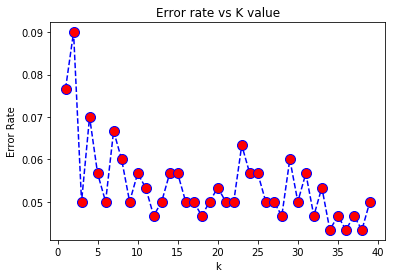

In [36]:
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('Error Rate')
#observe the output. for k=1, the error rate is around the 0.75 mark. As the value of k increases the error rate is eventually decreasing
#choose the k value around which not much of variation is there. If you observe around the 13-23 mark the error rate is about the same
# so we choose a k value of 17

In [37]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
#a bit of more accuracy

[[153   6]
 [  9 132]]


             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300

